In [47]:
%matplotlib inline
import os
import os.path as osp
import numpy as np
import tempfile
import tqdm
import urllib.request
import matplotlib.pyplot as plt
from cytokit import io as ck_io
from cytokit import config as ck_config
from cytokit.function import data as ck_data
from cytokit.image import proc as ck_img_proc

In [2]:
exp_name = '20181116-d40-r1-20x-5by5'
exp_dir = osp.join(tempfile.gettempdir(), 'cytokit-example', 'cellular-marker', exp_name)
raw_dir = osp.join(exp_dir, 'raw')
out_dir = osp.join(exp_dir, 'output')

In [3]:
url_format = 'https://storage.googleapis.com/cytokit/datasets/cellular-marker/{exp}/1_00001_Z{z:03d}_CH{ch}.tif'
urls = [url_format.format(exp=exp_name, z=z, ch=ch) for z in range(14, 21) for ch in range(1, 5)]
for url in tqdm.tqdm(urls):
    path = osp.join(raw_dir, osp.basename(url))
    if not osp.exists(osp.dirname(path)):
        os.makedirs(osp.dirname(path))
    if not osp.exists(path):
        urllib.request.urlretrieve(url, path)
print('Downloaded image files saved to %s' % raw_dir)
print('Example files:')
!find $raw_dir/*.tif | head

100%|██████████| 28/28 [00:23<00:00,  1.07it/s]


Downloaded image files saved to /tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw
Example files:
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z014_CH1.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z014_CH2.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z014_CH3.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z014_CH4.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z015_CH1.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z015_CH2.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z015_CH3.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z015_CH4.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z016_CH1.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/raw/1_00001_Z016_CH2.tif


In [11]:
%%bash -s "$out_dir"
cytokit config editor --base-config-path=/lab/repos/cytokit/pub/config/cellular-marker/experiment_pha.yaml --output-dir=$1 \
set name 'Cellular Marker Example' \
set acquisition.region_height 1 \
set acquisition.region_width 1 \
set acquisition.num_z_planes 7 \
set environment.index_symlinks '{z:{1:14,2:15,3:16,4:17,5:18,6:19,7:20}}' \
save_variant v00/config \
exit

2019-01-06 16:39:30,943:INFO:3490:cytokit.cli.config: Configuration saved to path "/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/config/experiment.yaml"


In [12]:
!cat $out_dir/v00/config/experiment.yaml | head -n 26

acquisition:
  axial_resolution: 1000.0
  channel_names: [DAPI, CD4, CD8, PHA]
  emission_wavelengths: [425, 525, 595, 670]
  lateral_resolution: 377.442
  magnification: 20
  num_cycles: 1
  num_z_planes: 7
  numerical_aperture: 0.75
  objective_type: air
  per_cycle_channel_names: [DAPI, FITC, TRITC, Cy5]
  region_height: 1
  region_names: [Region1]
  region_width: 1
  tile_height: 1008
  tile_overlap_x: 576
  tile_overlap_y: 432
  tile_width: 1344
  tiling_mode: snake
analysis:
- aggregate_cytometry_statistics: {mode: best_z_plane}
date: '2018-11-16 00:00:00'
environment:
  index_symlinks:
    z: {1: 14, 2: 15, 3: 16, 4: 17, 5: 18, 6: 19, 7: 20}
  path_formats: keyence_single_cycle_v01


In [6]:
variant_dir = osp.join(out_dir, 'v00')
!cytokit processor run_all --config-path=$variant_dir/config --data-dir=$raw_dir --output-dir=$variant_dir
!cytokit operator  run_all --config-path=$variant_dir/config --data-dir=$variant_dir
!cytokit analysis  run_all --config-path=$variant_dir/config --data-dir=$variant_dir

2019-01-06 16:33:32,423:INFO:2886:root: Execution arguments and environment saved to "/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/processor/execution/201901061633.json"
2019-01-06 16:33:42,789:INFO:2886:cytokit.exec.pipeline: Starting Pre-processing pipeline for 2 tasks (2 workers)
Using TensorFlow backend.
Using TensorFlow backend.
2019-01-06 16:33:47,653:INFO:2928:cytokit.exec.pipeline: Loaded tile 1 for region 1 [shape = (1, 7, 4, 1440, 1920)]
2019-01-06 16:33:47,654:INFO:2928:cytokit.exec.pipeline: Tile overlap crop complete [tile 1 of 1 (100.00%) | reg/x/y = 1/1/1 | shape (1, 7, 4, 1008, 1344) / dtype uint8]
2019-01-06 16:33:53,267:INFO:2928:cytokit.exec.pipeline: Focal plane selection complete [tile 1 of 1 (100.00%) | reg/x/y = 1/1/1 | shape (1, 1, 4, 1008, 1344) / dtype uint8]
2019-01-06 16:34:00,115:INFO:2928:cytokit.exec.pipeline: Tile cytometry complete; Statistics saved to "cytometry/statistics/R001_X001_Y001.csv" [tile 1 of 1 (100.00%) | reg/x/y

In [8]:
!find $variant_dir

/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/extract
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/extract/best_z_segm
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/extract/best_z_segm/R001_X001_Y001.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/montage
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/montage/best_z_segm
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/montage/best_z_segm/R001.tif
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/cytometry
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/cytometry/data.csv
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/cytometry/statistics
/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/cytometry/statistics/R0

In [21]:
config = ck_config.load(osp.join(variant_dir, 'config'))

In [33]:
extract_name = config.operator_params[0]['extract']['name']
tile, meta = ck_io.read_tile(osp.join(variant_dir, ck_io.get_montage_image_path(0, extract_name)), return_metadata=True)
tile.shape, tile.dtype, meta['labels']

((1, 1, 6, 1008, 1344),
 dtype('uint16'),
 ['cyto_cell_boundary',
  'cyto_nucleus_boundary',
  'proc_CD4',
  'proc_CD8',
  'proc_DAPI',
  'proc_PHA'])

In [46]:
channels = meta['labels']
ranges = {
    'proc_CD4': [0, 150],
    'proc_CD8': [0, 150],
    'proc_DAPI': [0, 255],
    'cyto_nucleus_boundary': [0, 1],
    'cyto_cell_boundary': [0, 1]
}
colors = {
    'proc_CD4': 'red',
    'proc_CD8': 'green',
    'proc_DAPI': 'blue',
    'proc_PHA': 'none',
    'cyto_nucleus_boundary': 'cyan',
    'cyto_cell_boundary': 'magenta'
}
img_proc = ck_img_proc.get_image_processor(channels, ranges=ranges, colors=colors)

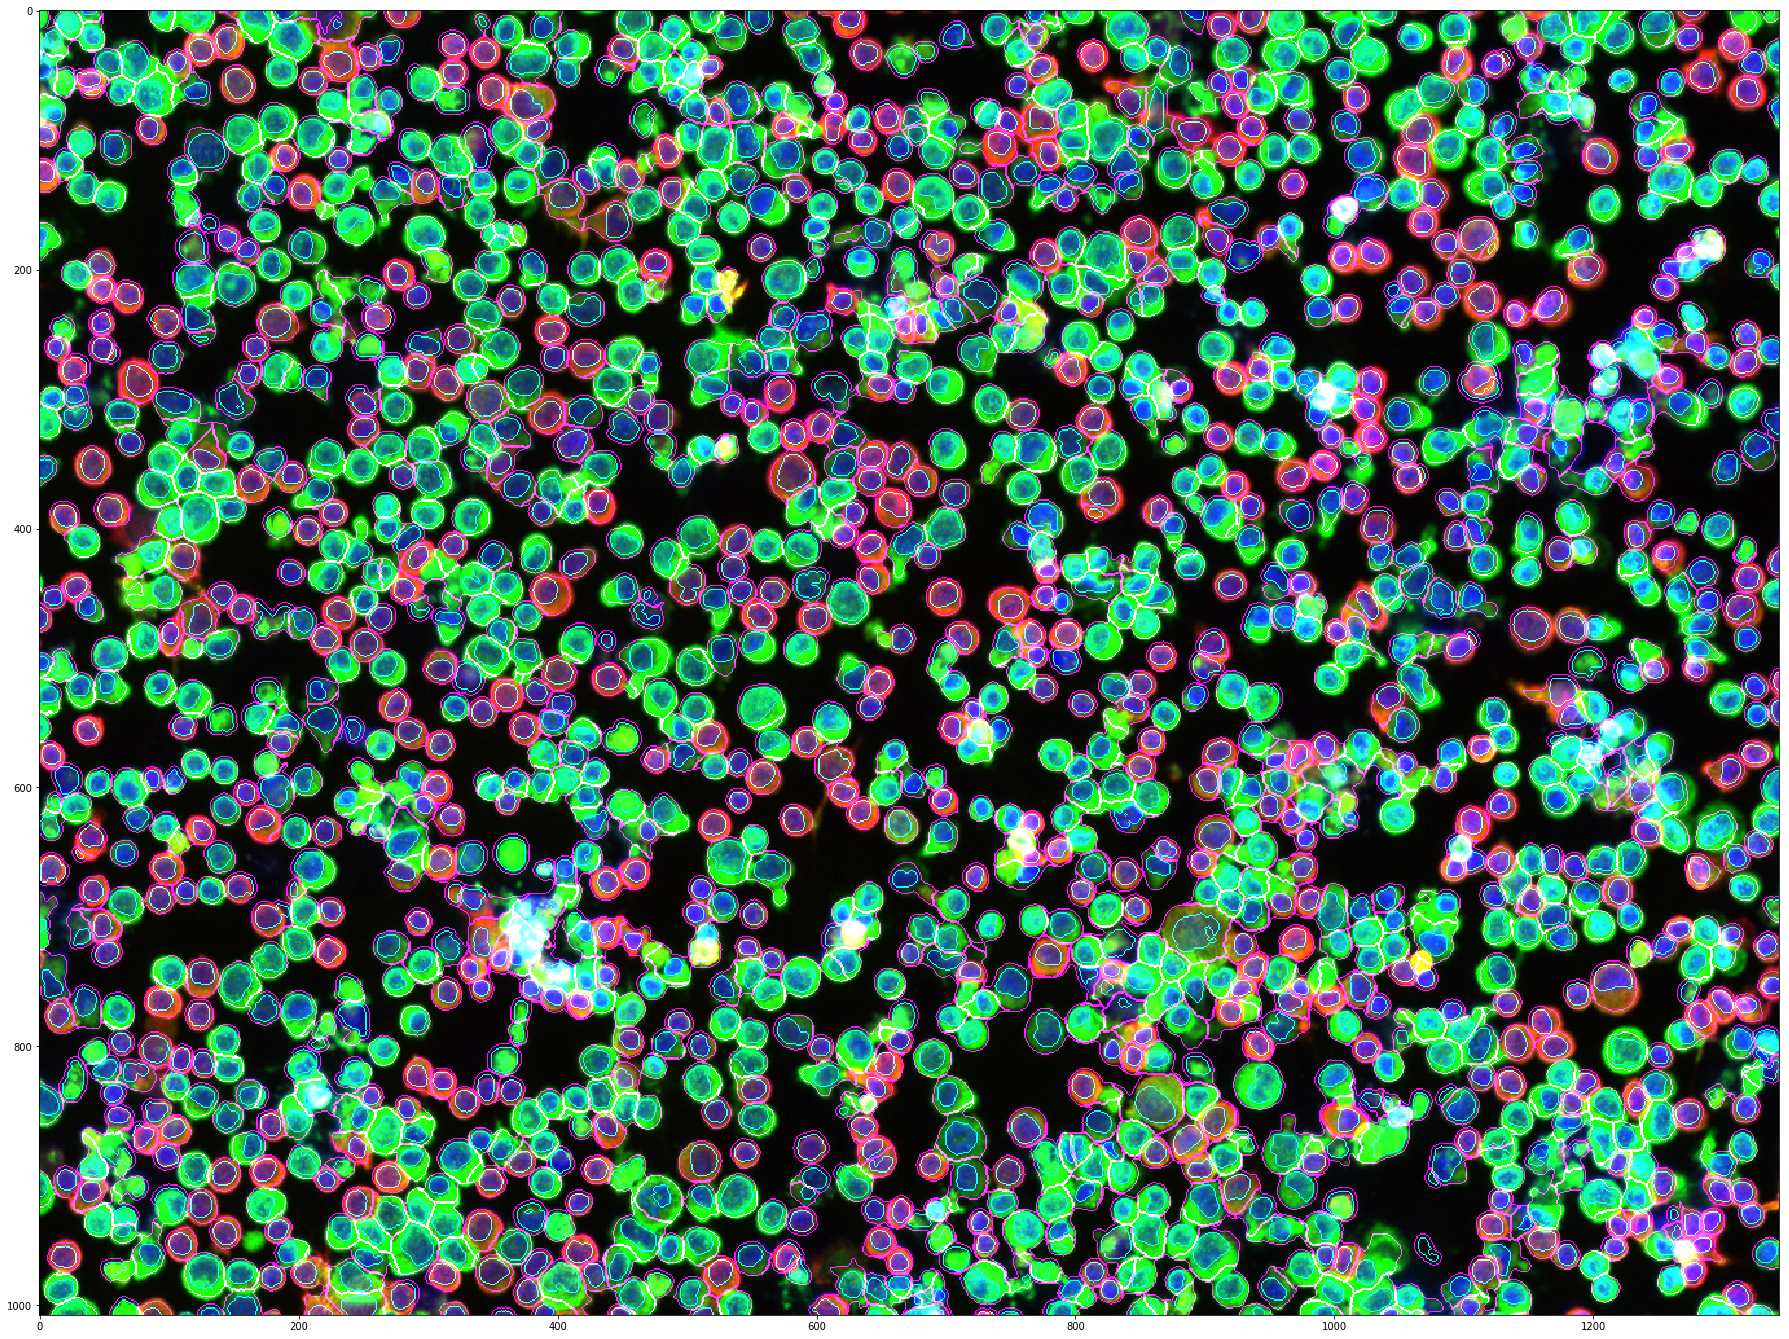

In [43]:
plt.imshow(img_proc.run(tile[0, 0]))
plt.gcf().set_size_inches(32, 24)

In [93]:
df = ck_data.get_cytometry_data(variant_dir, config, mode='best_z_plane')
df = ck_data.get_single_cell_image_data(variant_dir, df, extract_name, ranges=ranges, colors=colors, image_size=(32, 32))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 35 columns):
region_index           1586 non-null int64
tile_index             1586 non-null int64
tile_x                 1586 non-null int64
tile_y                 1586 non-null int64
rid                    1586 non-null int64
rx                     1586 non-null float64
ry                     1586 non-null float64
id                     1586 non-null int64
x                      1586 non-null float64
y                      1586 non-null float64
z                      1586 non-null int64
cell_size              1586 non-null float64
cell_diameter          1586 non-null float64
cell_perimeter         1586 non-null float64
cell_circularity       1586 non-null float64
cell_solidity          1586 non-null float64
nucleus_size           1586 non-null float64
nucleus_diameter       1586 non-null float64
nucleus_perimeter      1586 non-null float64
nucleus_circularity    1586 non-null float64
nucleus

In [94]:
#img_rgb = img_proc.run(tile[0, 0])
#img_rgba = np.append(img_rgb, 255*np.ones_like(img_rgb[..., 0:1]), axis=-1)
#img_rgba.shape

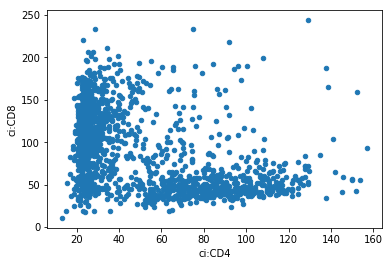

In [115]:
df.plot(kind='scatter', x='ci:CD4', y='ci:CD8')

In [118]:
def plot_cells(df, n=10, random_state=None):
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    df = df.sample(n=n, random_state=random_state)
    fig, ax = plt.subplots()
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    fig.set_size_inches(12, 12)
    ax.scatter(df['ci:CD4'], df['ci:CD8']) 
    artists = []
    for i, r in df.iterrows():
        oi = OffsetImage(r['image'], zoom=1)
        ab = AnnotationBbox(oi, (r['ci:CD4'], r['ci:CD8']), frameon=False)
        artists.append(ax.add_artist(ab))


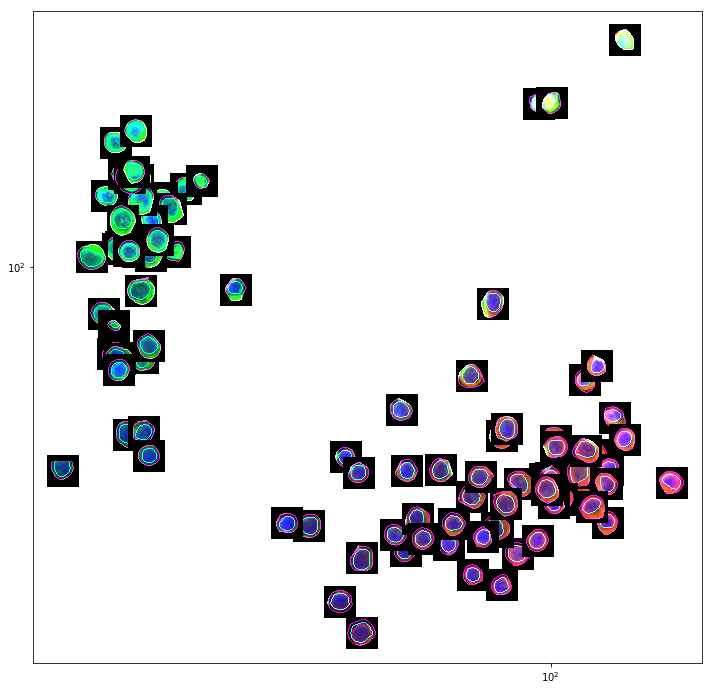

In [119]:
plot_cells(df.query('cell_circularity > .9 & nucleus_circularity > .9'), n=100, random_state=1)

In [20]:
! \
export APP_EXP_NAME=$exp_name; \
export APP_EXP_DATA_DIR=$variant_dir; \
export APP_EXP_CONFIG_PATH=$variant_dir/config/experiment.yaml; \
export APP_EXTRACT_NAME=best_z_segm; \
export APP_MONTAGE_NAME=best_z_segm; \
export APP_MONTAGE_CHANNEL_NAMES="proc_CD4,proc_CD8"; \
export APP_MONTAGE_CHANNEL_COLORS="red,green"; \
export APP_MONTAGE_CHANNEL_RANGES="0-200,0-200"; \
export APP_PORT=8050; \
cytokit application run_explorer

2019-01-06 16:50:07,749:INFO:3880:root: Running explorer app
2019-01-06 16:50:08,473:INFO:3880:cytokit_app.explorer.data: Loading montage image for the first time (this may take a bit but is only necessary once)
2019-01-06 16:50:08,490:INFO:3880:cytokit_app.explorer.data: Loaded montage image with shape = (2, 1008, 1344), dtype = uint16
2019-01-06 16:50:08,523:INFO:3880:cytokit_app.explorer.data: Loading cytometry data from path "/tmp/cytokit-example/cellular-marker/20181116-d40-r1-20x-5by5/output/v00/cytometry/data.csv"
2019-01-06 16:50:08,753:INFO:3880:cytokit_app.explorer.data: Loaded tile image for tile x = 0, tile y = 0, shape = (6, 1008, 1344), dtype = uint16
 * Serving Flask app "cytokit" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
2019-01-06 16:50:09,774:INFO:3880:werkzeug:  * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
2019-01-06 16:50:09,775:INFO:3880:werkzeug:  * Restarting with stat
2019-01-06 16:50:18,574: